## Observations
### 1. The @CBS news account has the most positive tweets on average
### 2. A slight majority of total tweets are positive, but they are pretty evenly spread
### 3. BBC has the highest neutral sentiment, but since they also have the lowest negative sentiment, they come out net positive

In [1]:
import os
import tweepy
import json
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
file_name = "api_keys.json"
data = json.load(open(file_name))

gkey = data['google_places_api_key']
consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

In [5]:
target_users = ['@BBC', '@CNN', '@CBS', '@FoxNews', '@nytimes']

counter = 1

sentiments = []

for user in target_users:

    for x in range(5):
        public_tweets = api.user_timeline(user, page=x)
   
        for twt in public_tweets:
            compound = analyzer.polarity_scores(twt['text'])["compound"]
            pos = analyzer.polarity_scores(twt['text'])["pos"]
            neu = analyzer.polarity_scores(twt['text'])["neu"]
            neg = analyzer.polarity_scores(twt['text'])["neg"]
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

            sentiments.append({"User" : user, "Date" : twt["created_at"], "Compound" : compound, "Positive" : pos, "Negative" : neg, "Neutral" : neu, "Tweets Ago" : counter})
       
            counter = counter + 1

In [14]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,User
0,0.0000,Sat Feb 03 16:00:05 +0000 2018,0.000,1.000,0.000,1,@BBC
1,0.0000,Sat Feb 03 15:00:09 +0000 2018,0.000,1.000,0.000,2,@BBC
2,0.0000,Sat Feb 03 14:37:33 +0000 2018,0.000,1.000,0.000,3,@BBC
3,0.4199,Sat Feb 03 14:00:10 +0000 2018,0.000,0.811,0.189,4,@BBC
4,-0.5423,Sat Feb 03 13:53:45 +0000 2018,0.137,0.863,0.000,5,@BBC


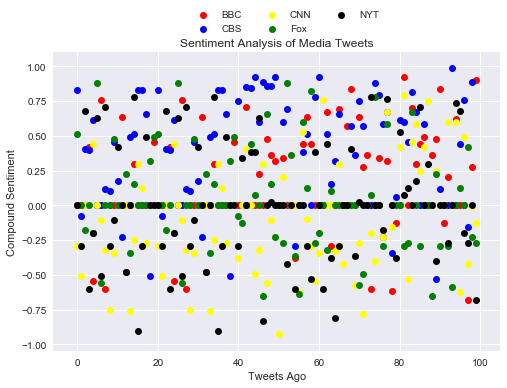

In [44]:
plt.style.use("seaborn")
bbc_plot = sentiments_pd[sentiments_pd['User'] == '@BBC']
plt.scatter(np.arange(len(bbc_plot["Compound"])), bbc_plot["Compound"],marker = 'o', color= 'red', linewidth=0, label="BBC")
cbs_plot = sentiments_pd[sentiments_pd['User'] == '@CBS']
plt.scatter(np.arange(len(cbs_plot["Compound"])), cbs_plot["Compound"],marker = 'o', color= 'blue', linewidth=0, label="CBS")
cnn_plot = sentiments_pd[sentiments_pd['User'] == '@CNN']
plt.scatter(np.arange(len(cnn_plot["Compound"])), cnn_plot["Compound"],marker = 'o', color= 'yellow', linewidth=0, label="CNN")
fox_plot = sentiments_pd[sentiments_pd['User'] == '@FoxNews']
plt.scatter(np.arange(len(fox_plot["Compound"])), fox_plot["Compound"],marker = 'o', color= 'green', linewidth=0, label="Fox")
nyt_plot = sentiments_pd[sentiments_pd['User'] == '@nytimes']
plt.scatter(np.arange(len(nyt_plot["Compound"])), nyt_plot["Compound"],marker = 'o', color= 'black', linewidth=0, label="NYT")

#plt.legend(handles=[bbc_plot, cbs_plot, cnn_plot, fox_plot, nyt_plot], loc='best')

plt.legend(loc='center right', bbox_to_anchor=(0.75, 1.1),
          ncol=3, fancybox=True, shadow=True)

plt.xlabel("Tweets Ago")
plt.ylabel("Compound Sentiment")
plt.title("Sentiment Analysis of Media Tweets")
#plt.legend(loc='lower left')
plt.show()

In [17]:
agg_compound = sentiments_pd.groupby('User').agg(np.mean)
agg_compound.reset_index(inplace=True)
agg_compound

,User,Compound,Negative,Neutral,Positive,Tweets Ago
0,@BBC,0.149713,0.029970,0.879770,0.090260,50.5
1,@CBS,0.344478,0.036212,0.782051,0.181717,250.0
2,@CNN,-0.070838,0.077040,0.871790,0.051160,150.5
3,@FoxNews,0.029709,0.066200,0.852600,0.081180,349.5
4,@nytimes,0.001333,0.080190,0.851120,0.068690,449.5


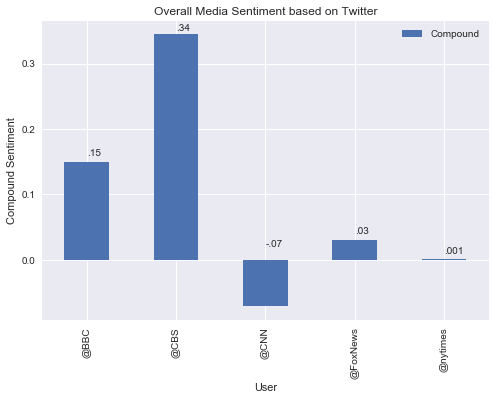

In [23]:
plt.style.use("seaborn")
agg_compound.plot(kind='bar', x='User', y='Compound', grid=True, title="Overall Media Sentiment based on Twitter")
plt.ylabel("Compound Sentiment")
plt.savefig('media_sentiment.png')
plt.text(0, .16, '.15' )
plt.text(1, .35, '.34' )
plt.text(2, .02, '-.07' )
plt.text(3, .04, '.03' )
plt.text(4, .01, '.001' )
plt.show()

In [11]:
sentiments_pd.to_csv("twitter_news_sentiment.csv")